<a href="https://colab.research.google.com/github/valerialrc/ufv/blob/main/ELT574_89397_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 3 - Redes Neurais Artificiais

Preparação do ambiente de programação e importação das principais bibliotecas.

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


### Atividade 3

Construindo modelos de rede perceptron multicamadas com a biblioteca Keras do TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras

##### Classificador de imagens com Keras

Vamos utilizar o dataset fashion MNIST. O MNIST é um dataset de imagens para problemas de classificação multiclasse.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

Já o dataset de teste é composto por 10.000 imagens de 28x28 pixels.

In [ ]:
X_test.shape

(10000, 28, 28)

Cada pixel das imagens é representado por um valor em escala de cinza, que vai de 0 a 255. O tipo das entradas é inteira, sem sinal, de 8 bits.

In [ ]:
X_train_full.dtype

dtype('uint8')

###### Separando os dados para validação durante o treinamento

Vamos dividir o dataset de treinamento para separmos um conjunto de validação que será utilizado durante o treinamento. Como o valor máximo de cada pixel pode ser 255, vamos normalizar o valor dos pixels para um valor float entre 0 e 1.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Podemos plotar as imagens do dataset utilizando o `imshow()` da biblioteca `matplotlib` com a cor em escala de cinza (mapeamento binário, `'binary'`).





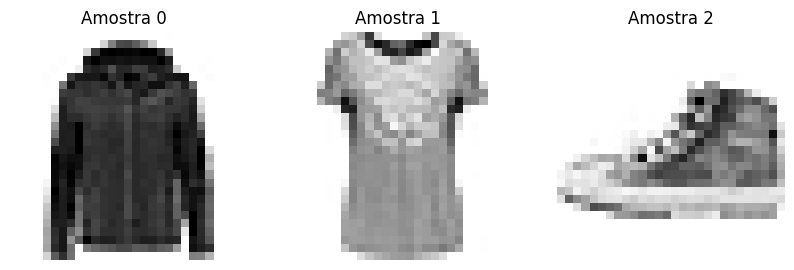

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Repare abaixo que os valores armazenados para o rótulo das classes são valores numéricos. Cada classe possui um número que representa:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [ ]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


Sendo assim, a primeira imagem do dataset de treinamento é:

In [ ]:
class_names[y_train[0]]

'Coat'

Algumas das imagens do dataset de treinamento:

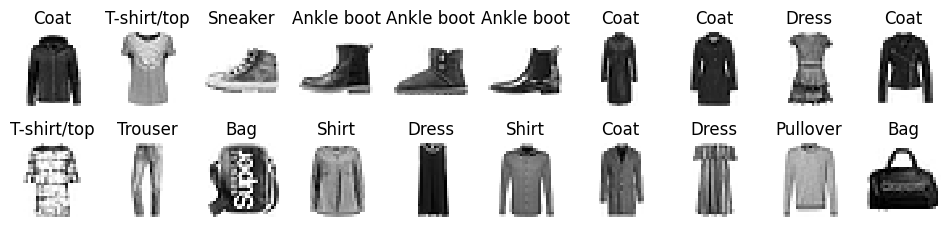

In [ ]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### Criando o modelo de PMC

Vamos criar um modelo de PMC para classificar as amostras! Como é um problema com imagens, vamos ajustar uma rede com duas camadas escondidas.

In [ ]:
# Criando o modelo de PMC
## Declaracao do modelo sequencial para o Keras
model = keras.models.Sequential()
## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
model.add(keras.layers.Dense(300, activation="relu"))
## Segunda camada escondida, com 100 neuronios e ReLU
model.add(keras.layers.Dense(100, activation="relu"))
## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
model.add(keras.layers.Dense(10, activation="softmax"))

Outra maneira de declarar o modelo sequencial com Keras poderia ser:

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

A estrutura do modelo pode ser verificada por:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


E as camadas do modelo por:

In [ ]:
model.layers

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [ ]:
hidden1 = model.layers[1]
hidden1

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04685912, -0.06224804, -0.02407793, ..., -0.07164545,
         0.04459653,  0.05711642],
       [ 0.02768773, -0.01857184,  0.05716066, ..., -0.04544894,
         0.01938508,  0.01550565],
       [-0.06812318,  0.03581471, -0.01952734, ..., -0.01861508,
        -0.05497264,  0.07289322],
       ...,
       [-0.01718159, -0.02650117, -0.04726638, ...,  0.04917905,
        -0.00135595,  0.04897107],
       [-0.03976921, -0.01697553,  0.01919477, ..., -0.07246047,
         0.06130311,  0.0487203 ],
       [-0.06481543,  0.00651031, -0.05204148, ..., -0.01271302,
         0.03500424,  0.07411869]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

###### Treinando o modelo de PMC

O treinamento do modelo é feito utilizando o método `'fit()'` para a classe model.

In [ ]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 0.7140 - accuracy: 0.7625 - val_loss: 0.5029 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4866 - accuracy: 0.8295 - val_loss: 0.4388 - val_accuracy: 0.8548
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4413 - accuracy: 0.8458 - val_loss: 0.4380 - val_accuracy: 0.8486
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4130 - accuracy: 0.8563 - val_loss: 0.3899 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3937 - accuracy: 0.8626 - val_loss: 0.3854 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3784 - accuracy: 0.8669 - val_loss: 0.3861 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3647 - accuracy: 0.8712 - val_loss: 0.3703 - val_accuracy

Outra forma de dividir o dataset para treinamento e validação (ao invés de usar o argumento `validation_data`) é utilizar o argumento `validation_split=0.1` para passar a quantidade de dados que devem ser utilizados para a validação durante a fase de treinamento.

###### Analisando os resultados do treinamento

O treinamento do modelo armazenou o histórico de todas as épocas no dicionário `history`. Podemos transformar este dicionário em um DataFrame do Pandas e manipular os dados dele para identificar o melhor modelo treinado.

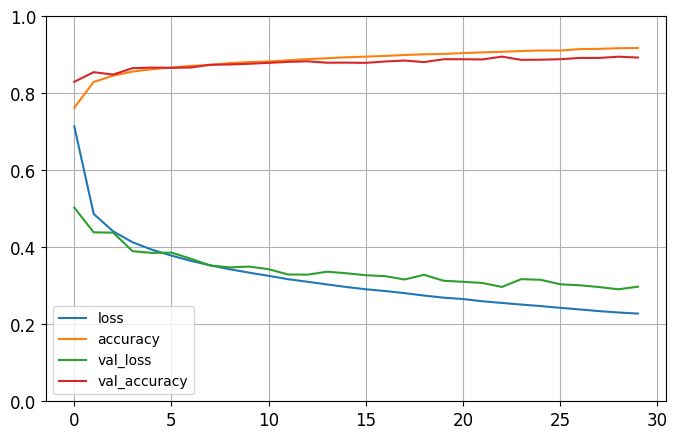

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Conseguimos um bom desempenho com este modelo e sem uma tendência de overfitting. Podemos ver isto porque o `loss` e o `val_loss`continuam diminuindo, apesar do `val_loss` estar com uma inclinação quase nula no final da última época treinada. Se o modelo continuasse o ajuste dos parâmetros, o `loss` continuaria descendo, mas, provavelmente, o `val_accuraccy` deixaria de acompanhar o `accuraccy` de treinamento.

Se o comportamento do modelo não foi satisfatório ainda depois do treinamento, podemos alterar os hiperparâmetros de treinamento, começando pela taxa de aprendizagem, o otimizador, número de camadas, número de neurônios por camada e os tipos de função de ativação.

Uma vez satisfeito com o modelo, podemos utilizar o dataset de teste para verificar mais uma vez o desempenho do PMC.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.8858


[0.3266978859901428, 0.8858000040054321]

###### Utilizando o modelo para fazer predições

Acertado o modelo, podemos começar a fazer predições para aplicação. Vamos tomar algumas amostras do dataset de teste para verificar as predições.

In [ ]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
list(y_test)

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 9,
 1,
 4,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 3,
 7,
 6,
 7,
 2,
 1,
 2,
 2,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 9,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 6,
 2,
 2,
 4,
 4,
 1,
 4,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 6,
 9,
 2,
 6,
 8,
 6,
 4,
 2,
 2,


In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [ ]:
y_new = y_test
y_new

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

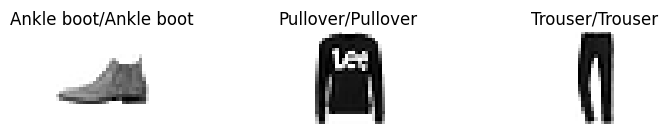

In [ ]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



---


---



---




---



---



---



---



Estimando o valor de algumas amostras não apresentadas durante o treinamento

313/313 [==============================] - 1s 2ms/step


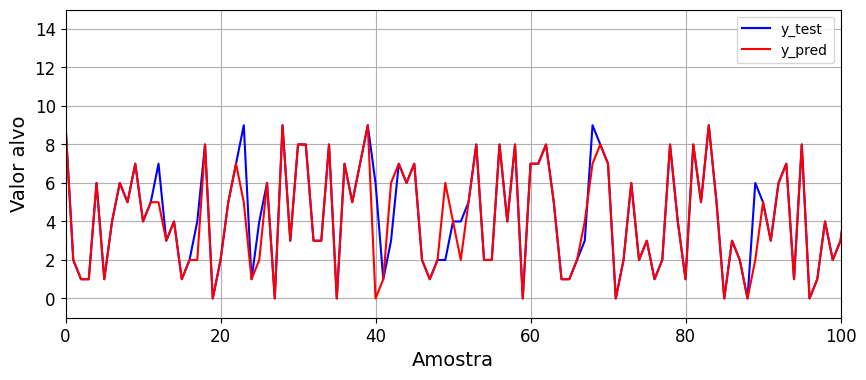

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_proba,axis=1)

plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(0,len(y_test)),y_test, "b", label="y_test")
plt.plot(range(0,len(y_pred)),y_pred, "r", label="y_pred")
plt.axis([0, 100, -1, 15])
plt.xlabel("Amostra")
plt.ylabel("Valor alvo")
plt.legend()

plt.show()

##### Busca dos melhores parâmetros para uma rede PMC

A quantidade de parâmetros para ser ajustado é a vantagem e a desvantagem das redes neurais. Por um lado, temos muitos parâmetros para ajustar o modelo da melhor forma aos dados. Por outro lado, existem muitas possibilidades para ajustar o modelo. Podemos fazer uma busca dos melhores parâmetros por meio do algoritmo de treinamento, sem precisar ajustar tudo manualmente.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
# Criando uma funcao para representar o modelo que sera treinado

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape)) #camada de achatamento da matriz 28x28 da imagem
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(10, activation="softmax")) #camada de saida com 10 saidas e funcao softmax (calcula probabilidade da classe)

  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=["accuracy"])
  model.summary()
  return model

Criando uma instência do regressor baseado na classe que foi definida.

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

Definindo os parâmetros que serão variados:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # implementa a k-fold cross-validation
from scipy.stats import reciprocal

param_distribs = {
    "n_hidden": [1],
    "n_neurons": np.arange(2000,3000),
    "learning_rate": [1e-1],
}

keras_reg = KerasClassifier(build_model, n_hidden=param_distribs["n_hidden"],
                           n_neurons=param_distribs["n_neurons"],
                           learning_rate=param_distribs["learning_rate"],
                           verbose=1)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=50,
              validation_data=(X_valid,y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)] # parada precipitada para evitar overfitting. patience=10 deixa ate 10 epocas sem melhora no indicador de desempenho ('val_loss')
              )

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 2818)              2212130   
                                                                 
 dense_39 (Dense)            (None, 10)                28190     
                                                                 
Total params: 2,240,320
Trainable params: 2,240,320
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1146/1146 [==============================] - 21s 18ms/step - loss: 0.5546 - accuracy: 0.8077 - val_loss: 0.4778 - val_accuracy: 0.8382
Epoch 2/50
1146/1146 [==============================] - 22s 19ms/step - loss: 0.4088 - accuracy: 0.8521 - val_loss: 0.3842 - val_accuracy: 0.8650
Epoch 3/50
1146

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(learning_rate=[0.1], model=<function build_model at 0x7c09e5454f70>, n_hidden=[1], n_neurons=array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2...
       2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934,
       2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945,
       2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956,
       2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967,
       2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978,
       2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989,
       2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999])})

In [ ]:
mse_test = rnd_search_cv.score(X_test,y_test)
print(f"O MSE do modelo foi {mse_test*100:.5f}%.")

313/313 [==============================] - 3s 8ms/step
O MSE do modelo foi 90.04000%.


In [ ]:
X_new = X_test[:10]
y_pred = rnd_search_cv.predict(X_new)
y_pred

1/1 [==============================] - 0s 26ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Agora já temos um objeto para ser treinado toda vez que for chamado. Precisamos definir quais hiperparâmetros serão alterados para encontrar a melhor configuração de rede PMC. Este processo pode levar algum tempo, não se preocupe (talvez horas).

Ao finalizar o treinamento, podemos acessar os melhores hiperparâmetros de acordo com a função de desempenho. Todos os parâmetros utilizados durante os n_inter treinamentos são relacionados pelo atributo $ cv_results_ $.

In [ ]:
rnd_search_cv.cv_results_

{'mean_fit_time': array([1083.07679256,  988.51060796,  999.64156135,  990.02480531,
        1203.16923602]),
 'std_fit_time': array([27.98090566, 42.55143394, 31.12443704,  6.78139581, 56.4356414 ]),
 'mean_score_time': array([6.24183599, 4.97105368, 6.48791154, 7.06179436, 6.93262823]),
 'std_score_time': array([2.96767739, 0.55448812, 2.85209776, 2.4528034 , 2.51372403]),
 'param_n_neurons': masked_array(data=[2818, 2507, 2625, 2561, 2984],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_hidden': masked_array(data=[1, 1, 1, 1, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neurons': 2818, 'n_hidden': 1, 'learning_rate': 0.1},
  {'n_neurons': 2507, 'n_hidden': 1

Os melhores parâmetros são armazenados nos atributos $ best_params_ $ e $best_score_$.

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 2818, 'n_hidden': 1, 'learning_rate': 0.1}

In [ ]:
rnd_search_cv.best_score_

0.8985636376188623

313/313 [==============================] - 2s 6ms/step


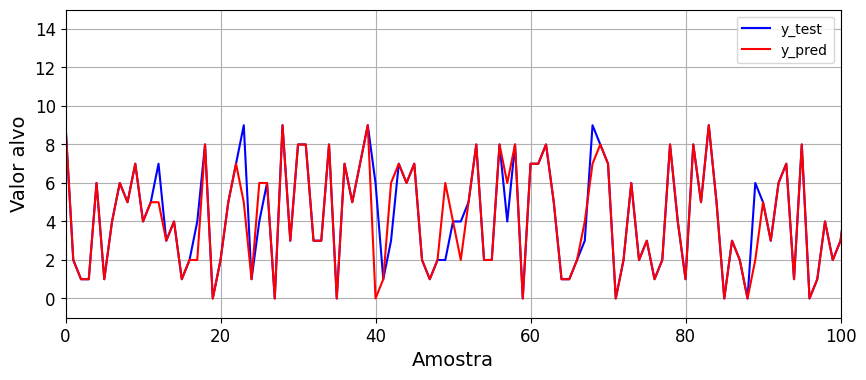

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

y_pred = rnd_search_cv.best_estimator_.predict(X_test)

plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(0,len(y_test)),y_test, "b", label="y_test")
plt.plot(range(0,len(y_pred)),y_pred, "r", label="y_pred")
plt.axis([0, 100, -1, 15])
plt.xlabel("Amostra")
plt.ylabel("Valor alvo")
plt.legend()

plt.show()

##### Estrutura do modelo (salvar e carregar)

É possível conhecer a estrutura do modelo utilizando o `plot_model` do Keras.

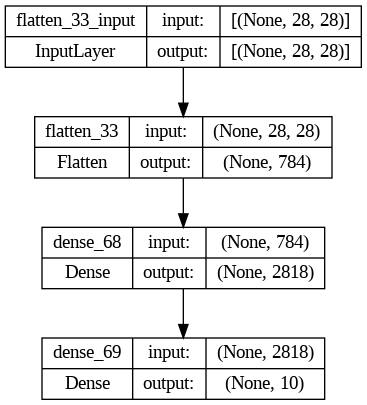

In [ ]:
model = rnd_search_cv.best_estimator_.model_

from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Depois de treinado, podemos salvar o modelo para carregar depois e utilizar em algum momento necessário.

In [ ]:
model.save("my_keras_model.h5")

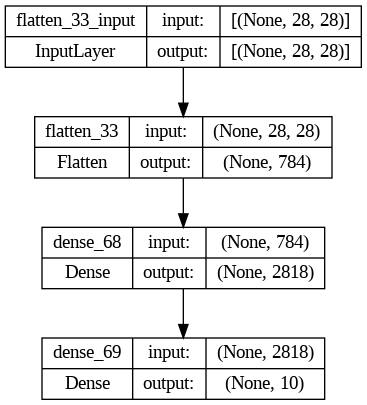

In [ ]:
model_loaded = keras.models.load_model("my_keras_model.h5")

from keras.utils import plot_model
plot_model(model_loaded, to_file='model_plot.png', show_shapes=True, show_layer_names=True)